<a href="https://colab.research.google.com/github/jvpalhares/IA353-vonzuben-pc2-2023.1/blob/main/PC2_Ativ7_AE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook #7**
## Autoencoder training and manifold visualization for the MNIST database.
## Partially based on [this material](https://www.kaggle.com/apapiu/manifold-learning-and-autoencoders).
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**  João Victor Palhares Barbosa

### Loading the main libraries

In [1]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

### Reading the data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_images = x_train.reshape(x_train.shape[0], 28, 28)

In [5]:
# Definition of a function to visualize some digits
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

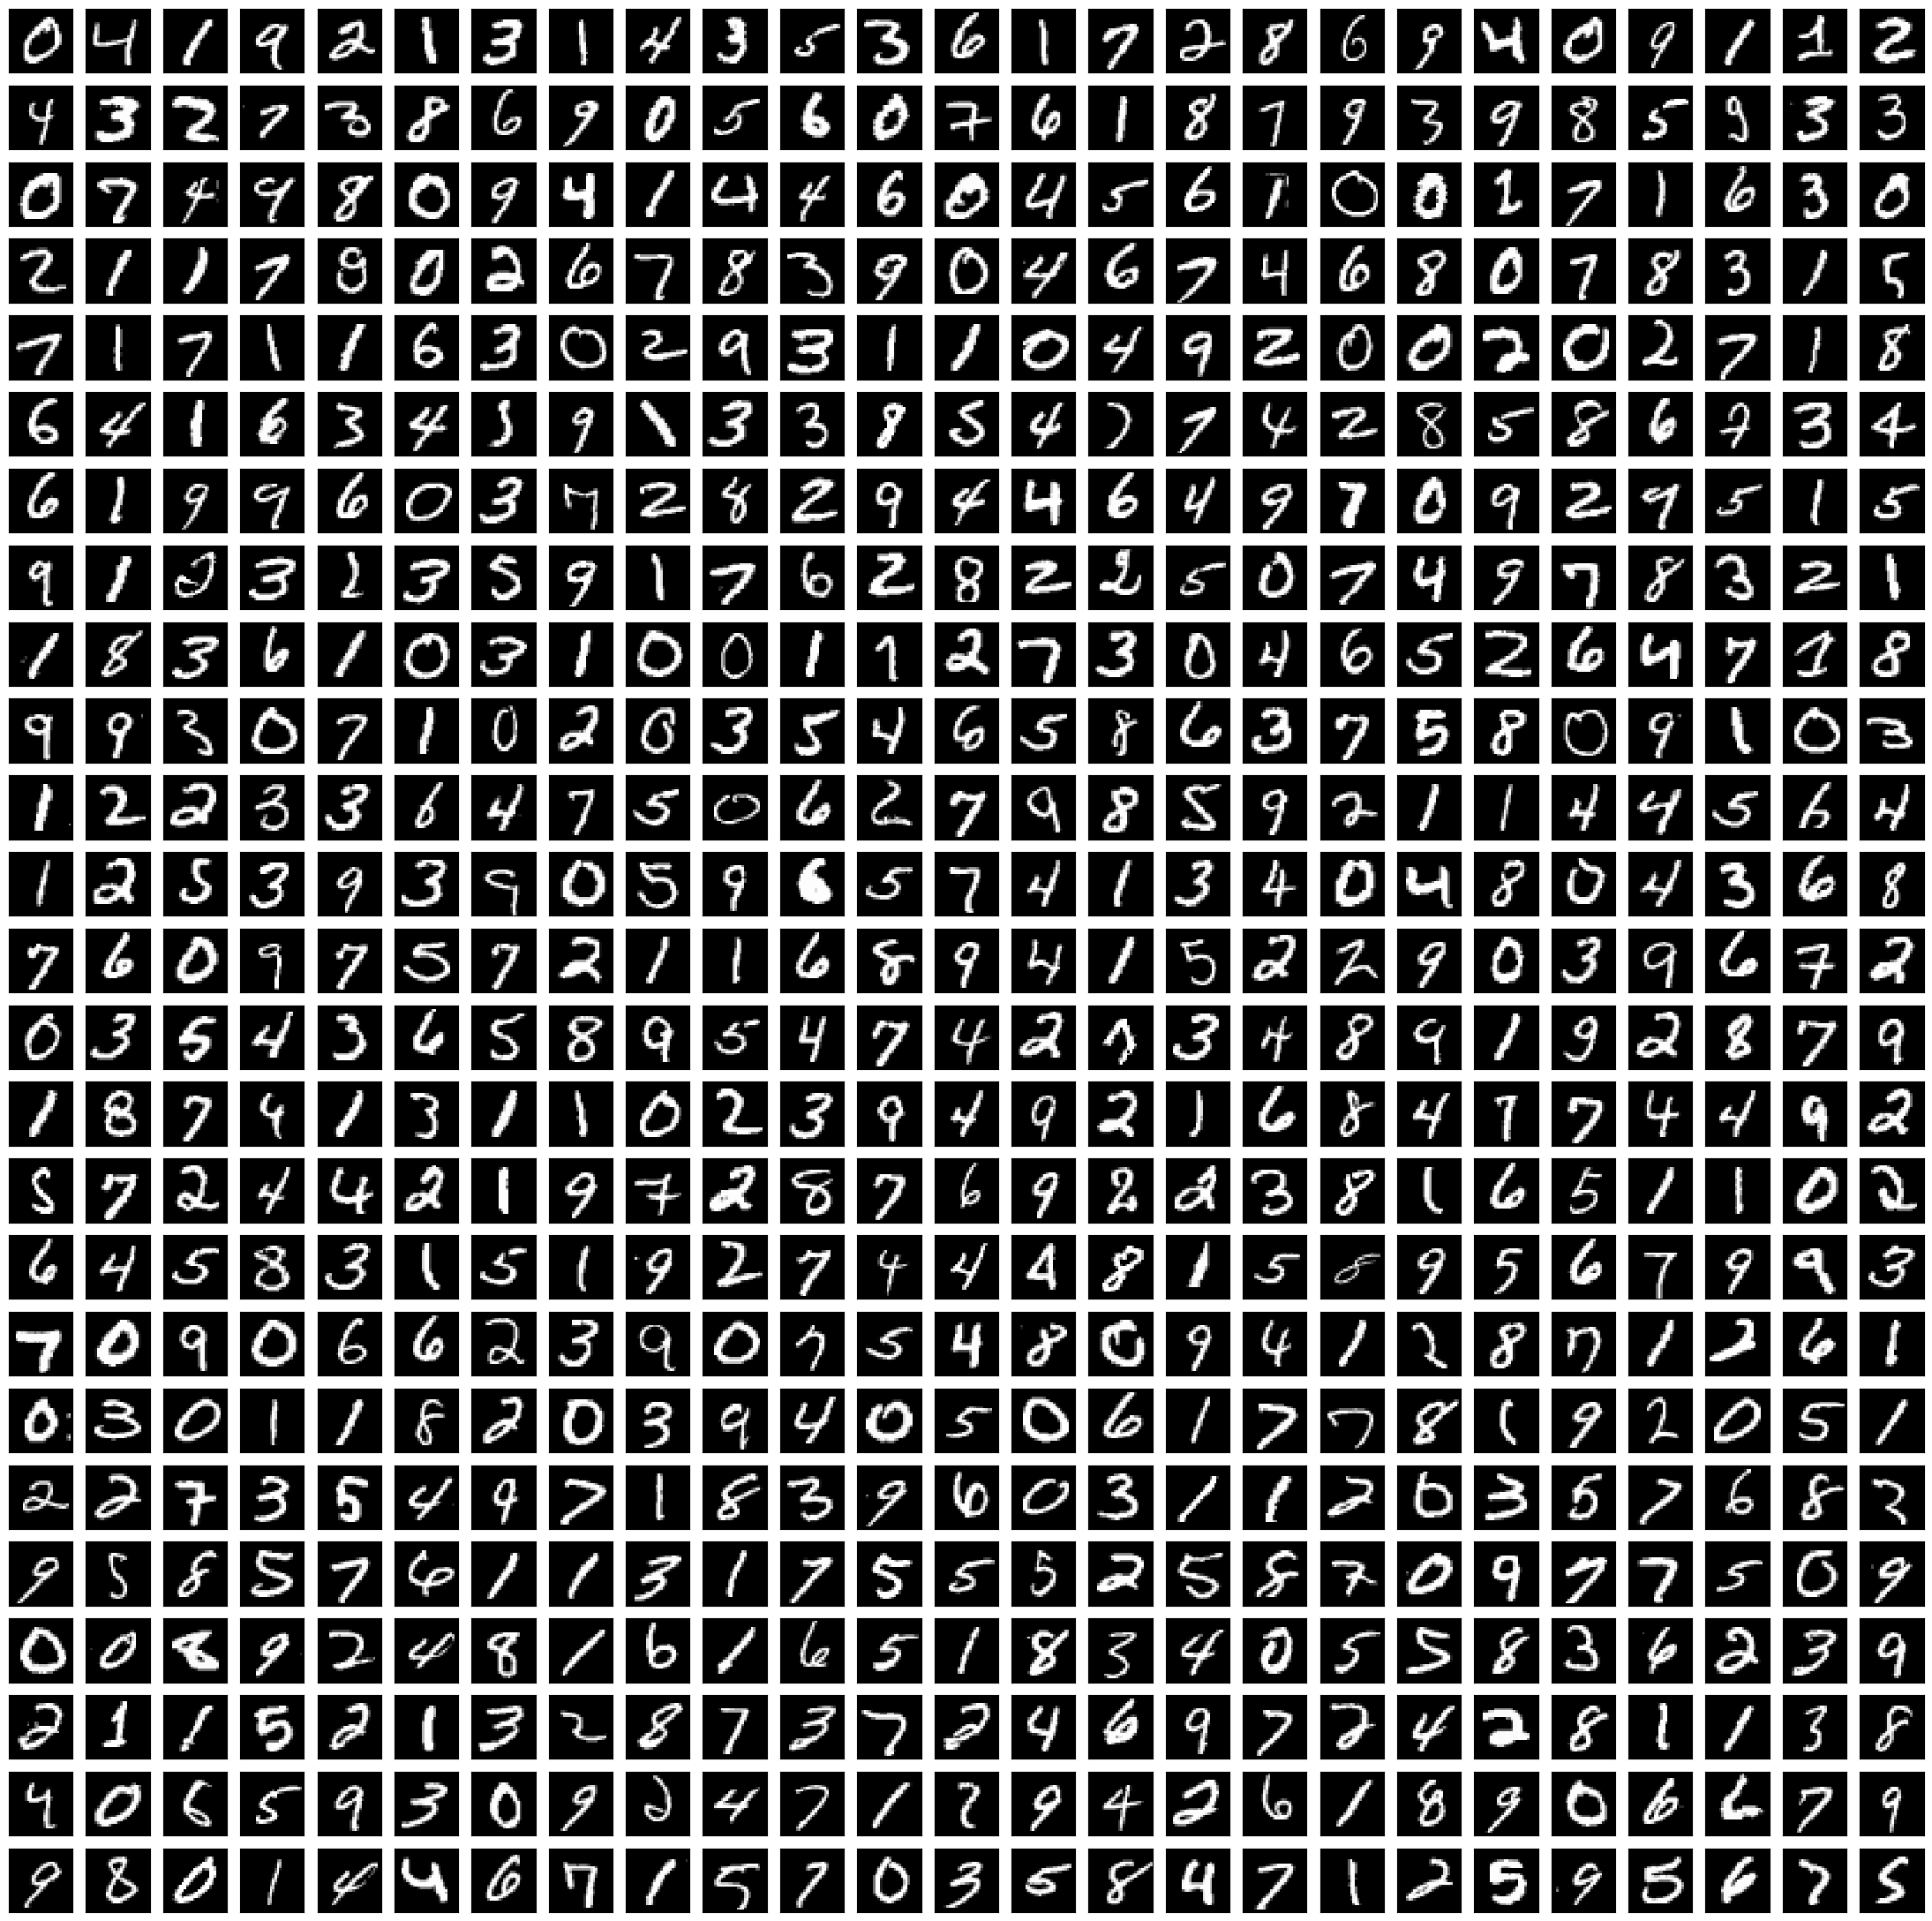

In [6]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(x_images[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

### Proposal for the autoencoder architecture

In [7]:
input_img = Input(shape=(784,))

encoded = Dense(512, activation='tanh')(input_img)
encoded = Dense(128, activation='tanh')(encoded)
encoded = Dense(32, activation='tanh')(encoded)

encoded = Dense(2)(encoded) # Linear activation function at the bottleneck

decoded = Dense(32, activation='tanh')(encoded)
decoded = Dense(128, activation='tanh')(decoded)
decoded = Dense(512, activation='tanh')(decoded)

decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 128)               4224  

In [9]:
autoencoder.compile(optimizer = "adam", loss = "mse")
X = x_train.reshape(x_train.shape[0], 784)
history = autoencoder.fit(X, X, batch_size = 128, epochs = 50, verbose = 1)

Epoch 1/50
469/469 [==============================] - 7s 6ms/step - loss: 0.0625
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0490
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0439
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0413
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0398
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0389
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0381
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0377
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0372
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0369
Epoch 11/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0367
Epoch 12/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0364
Epoch 13/50
469/469 [====

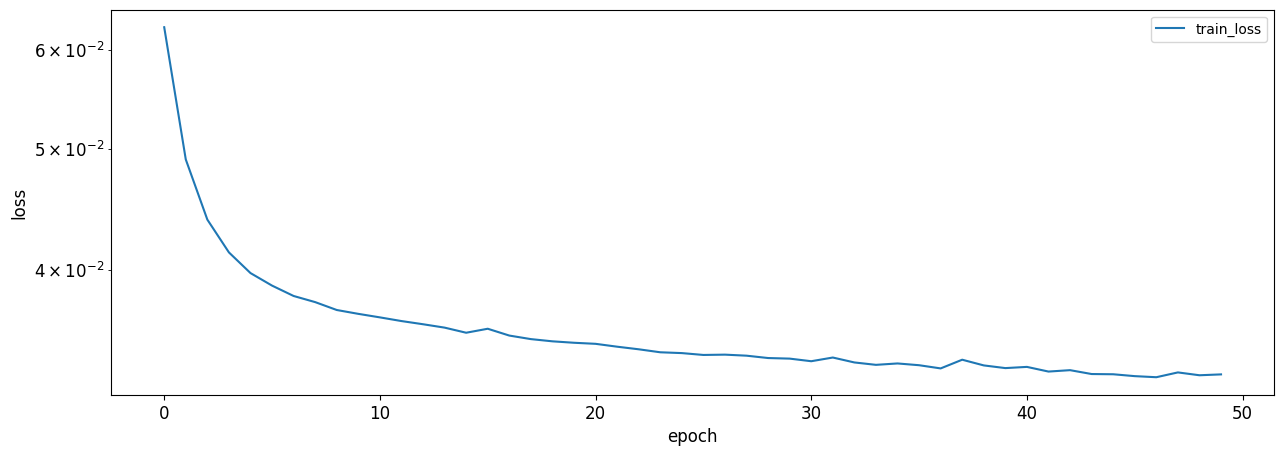

In [10]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

1/1 [==============================] - 0s 24ms/step


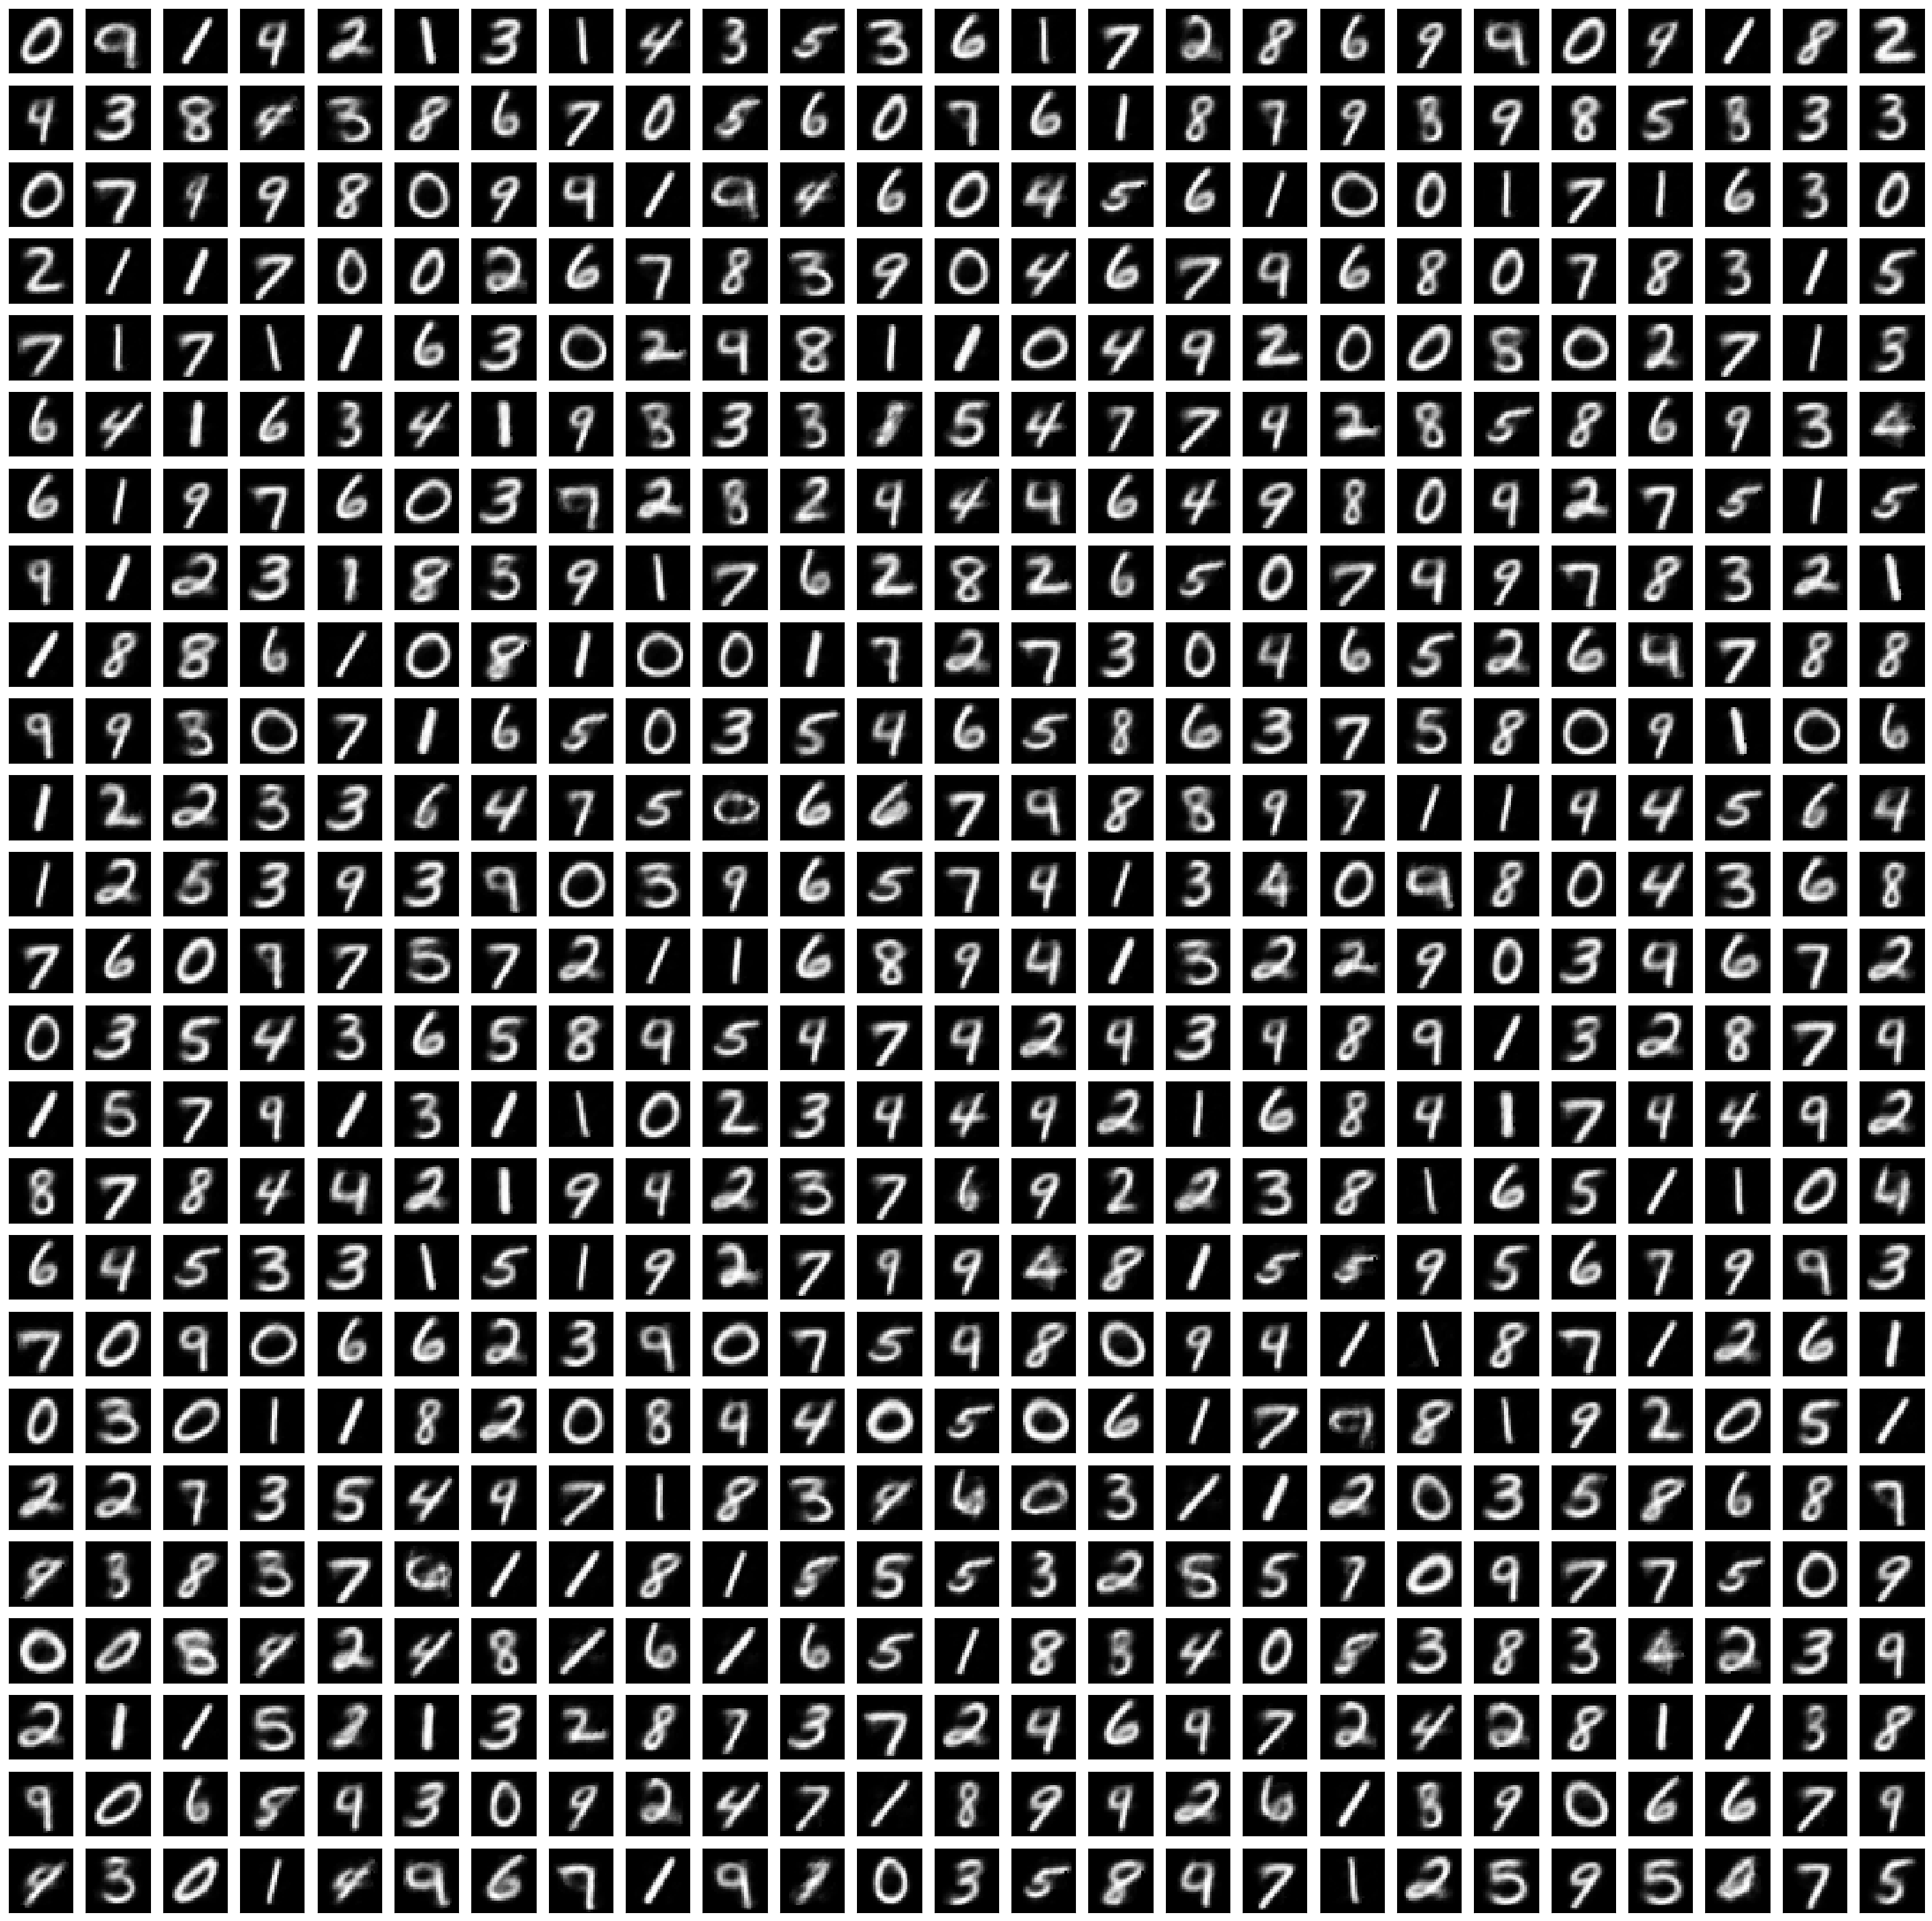

In [11]:
# Visualization of 25 x 25 reconstructed images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(autoencoder.predict(np.expand_dims(x_images[ind].flatten(), 0)).reshape(28, 28))
        plt.xticks([])
        plt.yticks([])
        ind+=1

In [12]:
encoder = Model(input_img, encoded)

# Building the decoder
encoded_input = Input(shape=(2,))
encoded_layer_1 = autoencoder.layers[-4]
encoded_layer_2 = autoencoder.layers[-3]
encoded_layer_3 = autoencoder.layers[-2]
encoded_layer_4 = autoencoder.layers[-1]

decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = encoded_layer_3(decoder)
decoder = encoded_layer_4(decoder)
decoder = Model(encoded_input, decoder)

### Visualizing the images in the manifold

1875/1875 [==============================] - 3s 2ms/step


<Axes: xlabel='comp_1', ylabel='comp_2'>

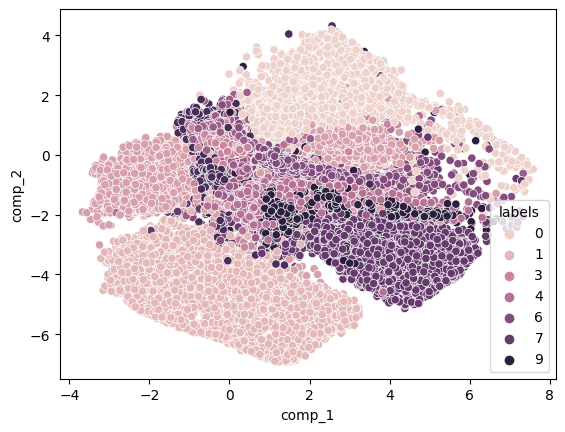

In [13]:
import seaborn as sns

x_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

x_proj = encoder.predict(x_flat[:60000])
x_proj.shape

proj = pd.DataFrame(x_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:60000]
sns.scatterplot(x="comp_1", y="comp_2", hue="labels", data=proj)


### Generating new digits by moving along the manifold (latent 2D space)
**Please, adjust the scale whenever necessary.**

### Moving along a circle

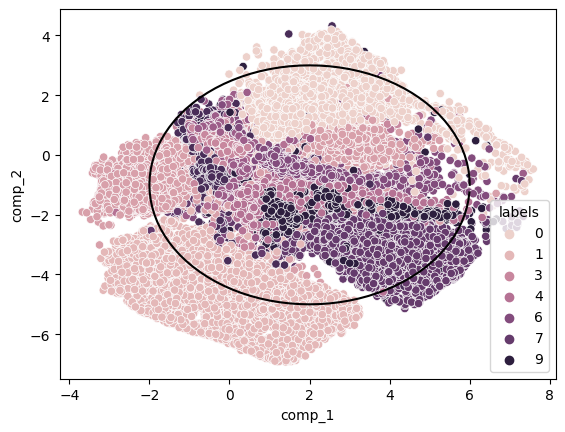

In [14]:
_ = sns.scatterplot(x="comp_1", y="comp_2", data=proj, hue="labels")
all_x = [4 * np.cos(2 * np.pi / 100 * i) + 2 for i in range(100)]
all_y = [4 * np.sin(2 * np.pi / 100 * i) - 1 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

1/1 [==============================] - 0s 20ms/step


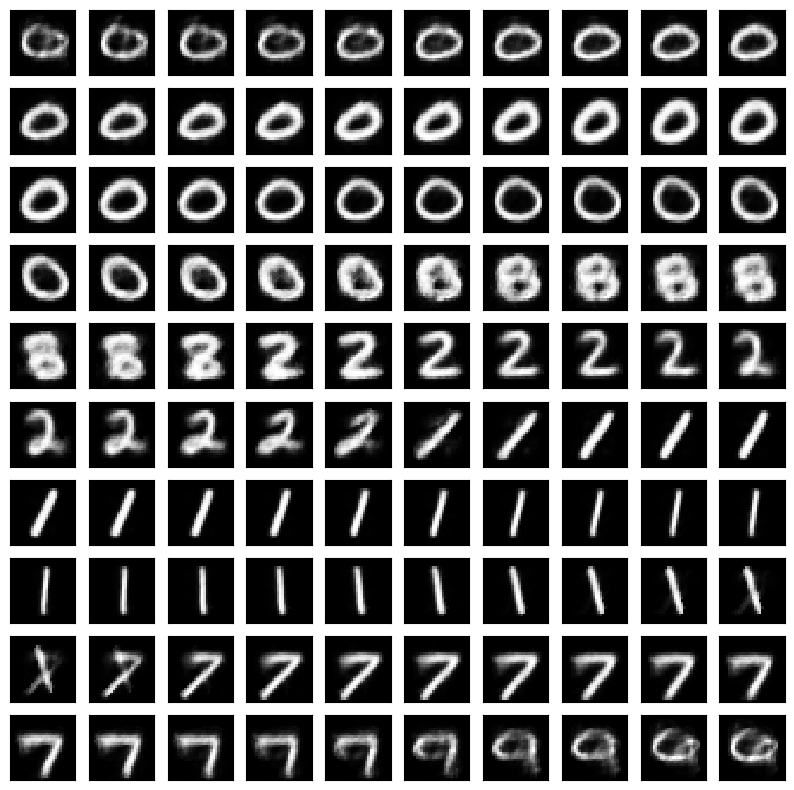

In [15]:
# moving along a circle:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 4 * np.cos(2 * np.pi / 100 * i) + 2
    y = 4 * np.sin(2 * np.pi / 100 * i) - 1
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### Moving along an ellipse

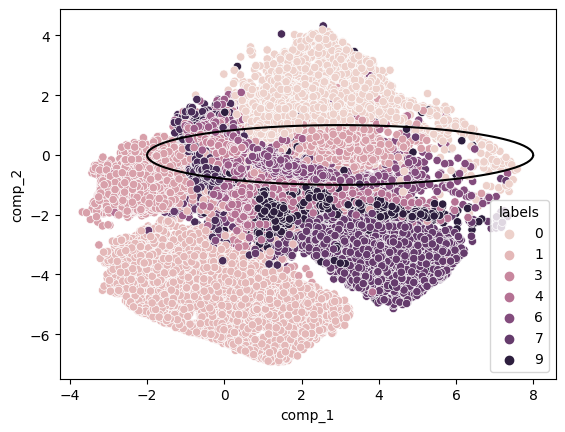

In [16]:
_ = sns.scatterplot(x="comp_1", y="comp_2", data=proj, hue="labels")
all_x = [5 * np.cos(2 * np.pi / 100 * i) + 3 for i in range(100)]
all_y = [1 * np.sin(2 * np.pi / 100 * i) + 0 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

1/1 [==============================] - 0s 17ms/step


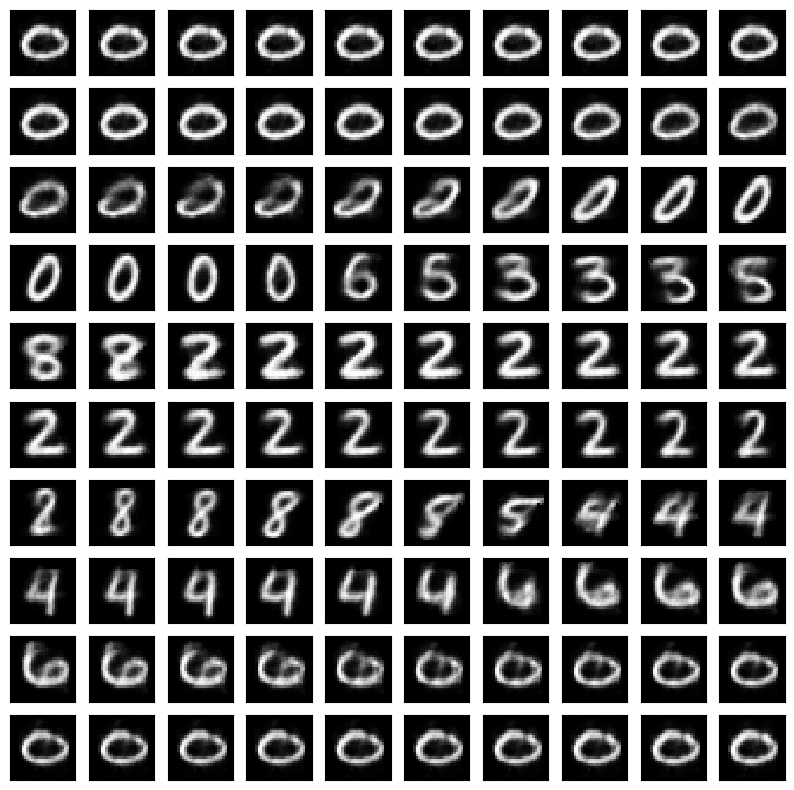

In [17]:
# Moving along an elipse:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 5 * np.cos(2 * np.pi / 100 * i) + 3
    y = 1 * np.sin(2 * np.pi / 100 * i) + 0
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### Moving along a grid

1/1 [==============================] - 0s 19ms/step


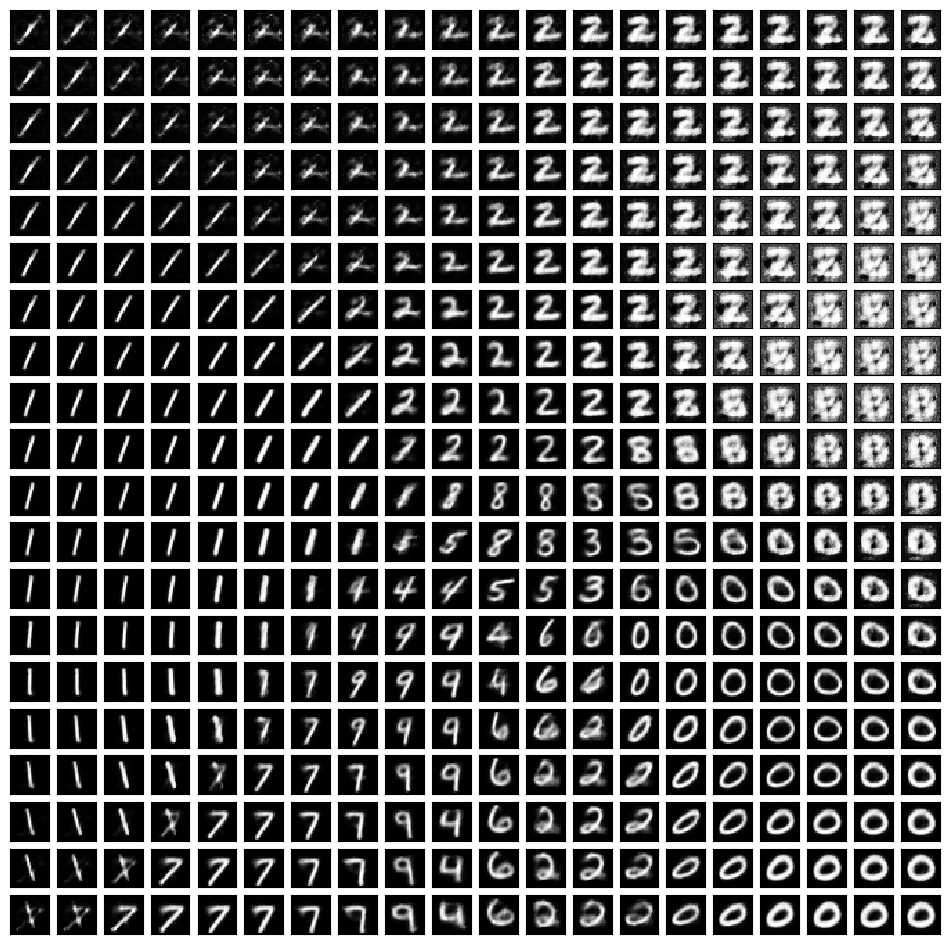

In [18]:
# Moving along a grid:
_ = plt.figure(figsize=(12, 12))

for i in range(20):
    for j in range(20):
        
        _ = plt.subplot(20, 20, i * 20 + j + 1)
        
        pt = np.array([[ -6 + 10 * i / 19, -6 + 10 * j / 19]])
        _ = show(decoder.predict(pt).reshape((28, 28)))
        _ = plt.xticks([])
        _ = plt.yticks([])